# Problem2

$$
\\it's\;been\;decided\;to\;tune\;on\;[0, \pi]\;and\;miror\;the\;next\;part\;to\;make\;symmetry
$$

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import minimize, fmin, rosen, differential_evolution 

In [1]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution

In [14]:
L = [1,2 ,4]
L[0]

1

In [82]:
# Generate universe variables
x_in = np.arange(0, np.pi, 0.01)
y_out = np.arange(0, 1, 0.01)


#well this function takes a vector/list of variables for mf boundies with input & spits out a number for sin()
def sin(X, x):
    x_lo = fuzz.trapmf(x_in, [X[0], X[1], X[2], X[3]])
    x_md = fuzz.trapmf(x_in, [X[4], X[5], X[6], X[7]])
    x_hi = fuzz.trapmf(x_in, [X[8], X[9], X[10], X[11]])
   
    y_lo = fuzz.trapmf(y_out, [X[12], X[13], X[14], X[15]])
    y_hi = fuzz.trapmf(y_out, [X[16], X[17], X[18], X[19]])
    
    x_le_lo = fuzz.interp_membership(x_in, x_lo, x)
    x_le_md = fuzz.interp_membership(x_in, x_md, x)
    x_le_hi = fuzz.interp_membership(x_in, x_hi, x)

    #rule1: if x == lo -> y = lo
    y_act_lo1 = np.fmax(np.fmin(x_le_lo, y_lo), 1-x_le_lo)
    
    #rule2: if x == md -> y = hi
    y_act_hi = np.fmax(np.fmin(x_le_md, y_hi), 1-x_le_md)
    
    #rule3: if x == hi -> y = lo
    y_act_lo2 = np.fmax(np.fmin(x_le_hi, y_lo), 1-x_le_hi)
    
    y_act_lo = np.fmin(y_act_lo1, y_act_lo2)
    
    agg = np.fmin(y_act_lo, y_act_hi)
    
    y = fuzz.defuzz(y_out, agg, 'centroid')
    
    return y
# # Generate fuzzy membership functions
# x_lo = fuzz.trapmf(x_in, [0, 0, 0.1, 2])
# x_md = fuzz.trapmf(x_in, [1, np.pi/2, np.pi/2, 3])
# x_hi = fuzz.trapmf(x_in, [2, 2, 3, np.pi])


# Visualize these universes and membership functions
# fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 15))

# ax0.plot(x, x_lo, 'b', linewidth=1.5, label='Low')
# ax0.plot(x, x_md, 'g', linewidth=1.5, label='Moderete')
# ax0.plot(x, x_hi, 'r', linewidth=1.5, label='High')
# ax0.set_title('light shineness')
# ax0.legend()

# ax1.plot(x_motion, motion_st, 'b', linewidth=1.5, label='Static')
# ax1.plot(x_motion, motion_mo, 'g', linewidth=1.5, label='Mobile')
# ax1.plot(x_motion, motion_hi, 'r', linewidth=1.5, label='Highly Mobile')
# ax1.set_title('Object Motion')
# ax1.legend()


# # Turn off top/right axes
# for ax in (ax0, ax1, ax2):
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.get_xaxis().tick_bottom()
#     ax.get_yaxis().tick_left()

# plt.tight_layout()

In [86]:
sin([0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.8, 2, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.6, 0.8, 1, 1], 2)

0.2835863489261548

In [87]:
np.sin(2)

0.9092974268256817

In [3]:
from pymoo.optimize import minimize

In [88]:
#ga() with 3 examples for example
#thats it=)


n_gen |  n_eval |     igd      |      gd      |      hv     
    1 |     100 |  1.968750093 |  2.604804832 |  0.00000E+00
    2 |     200 |  1.734489567 |  2.581573950 |  0.00000E+00
    3 |     300 |  1.734489567 |  2.459669453 |  0.00000E+00
    4 |     400 |  1.734489567 |  2.494031231 |  0.00000E+00
    5 |     500 |  1.717832911 |  2.121980227 |  0.00000E+00
    6 |     600 |  1.185966215 |  2.078544110 |  0.00000E+00
    7 |     700 |  1.185966215 |  2.085332953 |  0.00000E+00
    8 |     800 |  1.034422085 |  1.967599712 |  0.00000E+00
    9 |     900 |  1.031204325 |  1.672868174 |  0.00000E+00
   10 |    1000 |  0.957837861 |  1.328719106 |  0.00000E+00
   11 |    1100 |  0.949759789 |  1.316097258 |  0.00000E+00
   12 |    1200 |  0.884360161 |  1.269278705 |  0.00000E+00
   13 |    1300 |  0.850114718 |  1.187657401 |  0.00000E+00
   14 |    1400 |  0.830429218 |  1.031565288 |  0.00000E+00
   15 |    1500 |  0.735030226 |  1.032345638 |  0.015573226
   16 |    1600 |  0.697

  135 |   13500 |  0.007741729 |  0.008169321 |  0.653254999
  136 |   13600 |  0.007881799 |  0.008515117 |  0.653095806
  137 |   13700 |  0.008061790 |  0.008200454 |  0.652863176
  138 |   13800 |  0.007854627 |  0.008120995 |  0.653274630
  139 |   13900 |  0.007650365 |  0.007941395 |  0.653658063
  140 |   14000 |  0.007350081 |  0.007543399 |  0.653859287
  141 |   14100 |  0.007496230 |  0.008157989 |  0.653642278
  142 |   14200 |  0.007327358 |  0.008210623 |  0.653870132
  143 |   14300 |  0.007528801 |  0.008119606 |  0.653746532
  144 |   14400 |  0.007534946 |  0.008122157 |  0.653723012
  145 |   14500 |  0.007245524 |  0.007997986 |  0.654175094
  146 |   14600 |  0.007033061 |  0.007668512 |  0.654529013
  147 |   14700 |  0.006930755 |  0.007913533 |  0.654717348
  148 |   14800 |  0.006953340 |  0.007939030 |  0.654873981
  149 |   14900 |  0.006786343 |  0.007189564 |  0.655018576
  150 |   15000 |  0.006504530 |  0.007314722 |  0.655469655
  151 |   15100 |  0.006

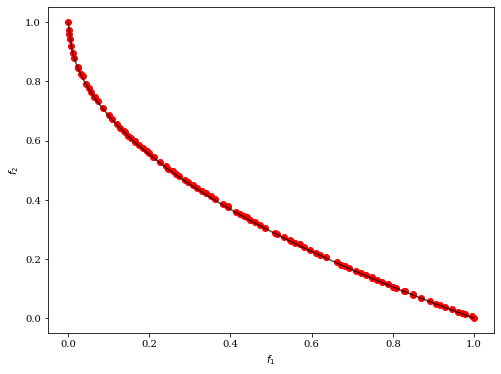

In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=True)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.show()